In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/StudentsPerformance (1).csv")

In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [34]:

Etendue = df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']] \
            .agg(lambda x: x.max() - x.min())
print(Etendue)

                math score  reading score  writing score
race/ethnicity                                          
group A                 72             77             78
group B                 89             73             81
group C                 98             83             90
group D                 74             69             68
group E                 70             74             78


In [ ]:
Numeric_values = df.select_dtypes(include='number')
MoyenneValues = Numeric_values.mean()
MedianValues = Numeric_values.median()
ModeValues = Numeric_values.mode()

print("Distribution analysis for each score type:")
for score_type in MoyenneValues.index:
    mean_val = MoyenneValues[score_type]
    median_val = MedianValues[score_type]

    if -1 < (mean_val - median_val) <= 1:
        print(f"{score_type}: Distribution symétrique")
    elif mean_val > median_val:
        print(f"{score_type}: Asymétrie positive")
    else:
        print(f"{score_type}: Asymétrie négative")

Distribution analysis for each score type:
math score: Distribution symétrique
reading score: Distribution symétrique
writing score: Distribution symétrique


In [ ]:
Variance = Numeric_values.var()
EcartType = Numeric_values.std()
print(EcartType,Variance,sep="\n\n")
print(f"la matier présente la plus grand variabilité des scores est {EcartType.idxmax()} avec un score de {EcartType.max()}" )

for i in EcartType:

     if i <15:
       print("faible variabilité")
     else:
        print("forte variabilité")

math score       15.163080
reading score    14.600192
writing score    15.195657
dtype: float64

math score       229.918998
reading score    213.165605
writing score    230.907992
dtype: float64
la matier présente la plus grand variabilité des scores est writing score avec un score de 15.195657010869642
forte variabilité
faible variabilité
forte variabilité


In [35]:
Quartiles = Numeric_values.quantile([0.25,0.5,0.75])
print(f" the Quartiles are \n{Quartiles}")
IQR = Quartiles.loc[0.75]-Quartiles.loc[0.25]
print(f"the IQR is \n{IQR}")

outlier_condition = (Numeric_values < (Quartiles.loc[0.25]-1.5*IQR)) | (Numeric_values >(Quartiles.loc[0.75]+1.5*IQR))

if outlier_condition.any().any():
    print("présence des valeurs aberrantes")
else:
    print("Pas de présence des valeurs aberrantes")

 the Quartiles are 
      math score  reading score  writing score
0.25        57.0           59.0          57.75
0.50        66.0           70.0          69.00
0.75        77.0           79.0          79.00
the IQR is 
math score       20.00
reading score    20.00
writing score    21.25
dtype: float64
présence des valeurs aberrantes


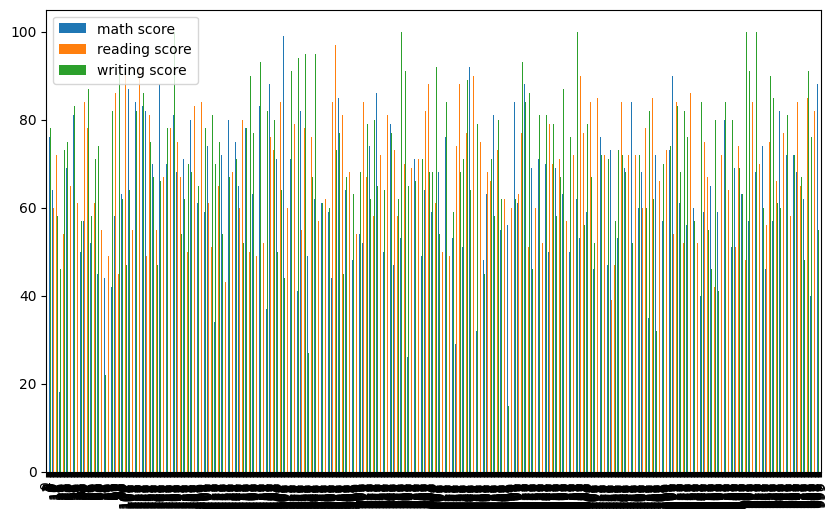

In [ ]:
Numeric_values.plot(kind='bar',figsize=(10,6))
plt.show()

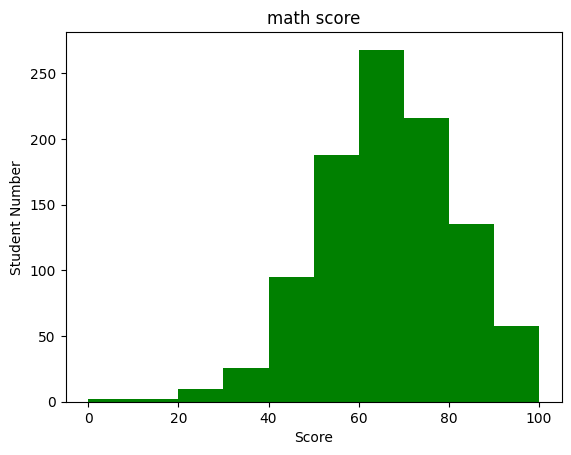

In [ ]:
plt.hist(Numeric_values['math score'],color='green')
plt.title('math score')
plt.xlabel("Score")
plt.ylabel("Student Number")
plt.show()

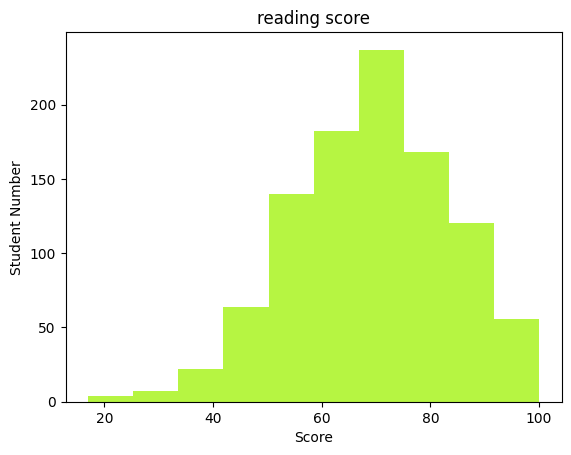

In [ ]:
plt.hist(Numeric_values['reading score'],color='#b6f542')
plt.title('reading score')
plt.xlabel("Score")
plt.ylabel("Student Number")
plt.show()

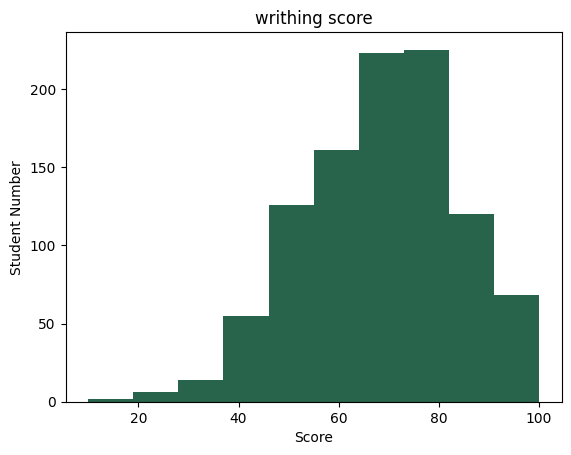

In [32]:
plt.hist(Numeric_values['writing score'],color='#28634b')
plt.title('writhing score')
plt.xlabel("Score")
plt.ylabel("Student Number")
plt.show()

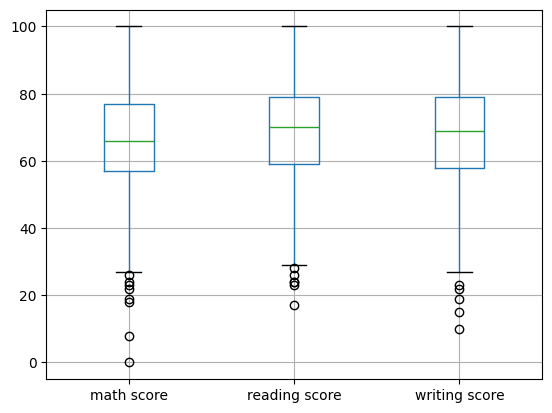

In [37]:
Numeric_values.boxplot()

plt.show()